In [2]:
import re  # for string splitting
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.pylab as pl

import cvlib as cv
import pandas as pd
import os
from cvlib.object_detection import draw_bbox
import datetime
from ipywidgets import *

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)


from scipy.signal import savgol_filter

plt.rc('axes', axisbelow=True)

Using TensorFlow backend.


Results_200311/Scans:
found 3826 files
sorted


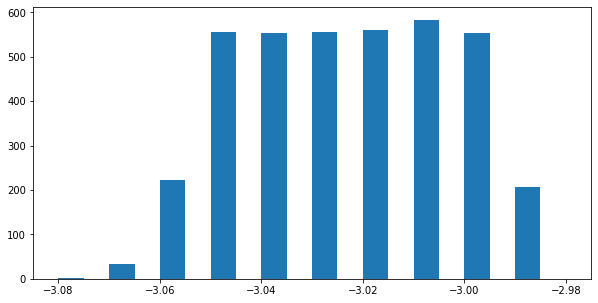

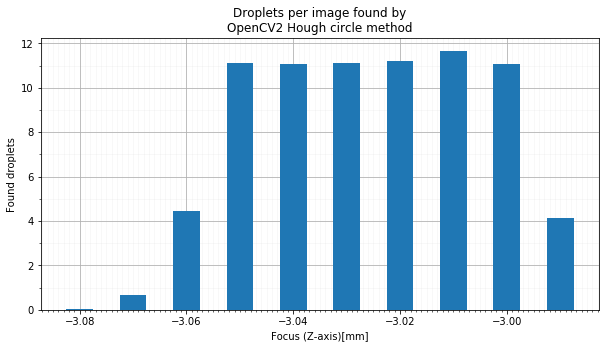

In [2]:
current_path = cwd = os.getcwd()

directories_with_inputs = ['Results_200311/Scans']

droplets_distances = []

for directory_with_input_index, directory_with_input in enumerate(directories_with_inputs):
    path_to_files = '/'.join([current_path, directory_with_input])
    path_to_results = '/'.join([cwd, 'Results_' + directory_with_input])
    os.makedirs(path_to_results, exist_ok=True)

    list_of_files = [my_file for my_file in os.listdir(
        path_to_files) if not my_file.startswith('.')]  # to avoid hidden files like .DS_file
    print(directory_with_input+':')
    print('found {0} files'.format(str(len(list_of_files))))
    list_of_files.sort()
    print('sorted')

    list_of_files_to_do = list_of_files.copy()  # [0:4000:300]

    list_of_image_files = []

    for file_index, file_name in enumerate(list_of_files_to_do):
        splitted = re.split('_|-', file_name)
        distance = np.round(-(np.add(int(splitted[1]), np.multiply(
            int(splitted[2]), 0.0100000))), decimals=2)
        # print(distance)
        droplets_distances.append(distance)
        # print(file_name)

np.unique(np.array(droplets_distances))

fig0=plt.figure(num=0,figsize=[10, 5])
ax0=fig0.gca()
droplet_counts, droplet_bins, dump = ax0.hist(
    droplets_distances, bins=np.unique(np.array(droplets_distances)), width=0.005)


fig=plt.figure(num=1,figsize=[10, 5])
ax = plt.gca()
ax.xaxis.set_minor_locator(MultipleLocator(0.001))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.grid(which='major')
ax.grid(which='minor', alpha=0.1)
ax.bar(droplet_bins[:-1], droplet_counts/50, width=0.005,)
ax.set_ylabel('Found droplets')
ax.set_title('Droplets per image found by\nOpenCV2 Hough circle method')

ax.set_xlabel('Focus (Z-axis)[mm]')

plt.savefig('Results_200311/Found_droplets.png')

In [3]:
plt.close('all')
ax.clear()
ax2.clear()

NameError: name 'ax2' is not defined

200311/Scans:
found 1100 files
sorted


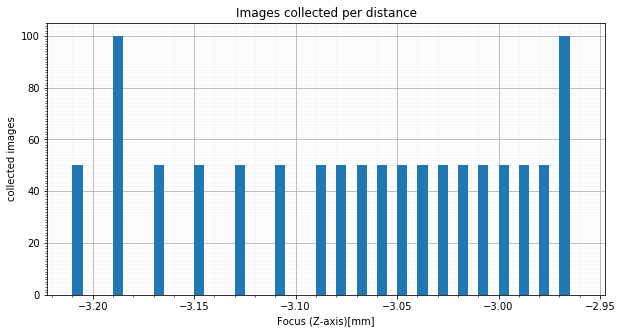

In [3]:


current_path = cwd = os.getcwd()

directories_with_inputs = ['200311/Scans']

distances = []

for directory_with_input_index, directory_with_input in enumerate(directories_with_inputs):
    path_to_files = '/'.join([current_path, directory_with_input])
    path_to_results = '/'.join([cwd, 'Results_' + directory_with_input])
    os.makedirs(path_to_results, exist_ok=True)

    list_of_files = [my_file for my_file in os.listdir(
        path_to_files) if not my_file.startswith('.')]  # to avoid hidden files like .DS_file
    print(directory_with_input+':')
    print('found {0} files'.format(str(len(list_of_files))))
    list_of_files.sort()
    print('sorted')

    list_of_files_to_do = list_of_files.copy()  # [0:4000:300]

    list_of_image_files = []

    for file_index, file_name in enumerate(list_of_files_to_do):
        splitted = re.split('_|-', file_name)
        distance = np.round(-(np.add(int(splitted[1]), np.multiply(
            int(splitted[2]), 0.0100000))), decimals=2)
        # print(distance)
        distances.append(distance)
        # print(file_name)


np.unique(np.array(distances))

plt.figure(num=5,figsize=[10,5])
ax2 = plt.gca()
ax2.xaxis.set_minor_locator(MultipleLocator(0.01))
ax2.yaxis.set_minor_locator(MultipleLocator(1))
ax2.grid(which='major')
ax2.grid(which='minor', alpha=0.1)
ax2.set_ylabel('collected images')
ax2.set_title('Images collected per distance')
ax2.set_xlabel('Focus (Z-axis)[mm]')

#plt.figure()

image_counts, image_bins, dump = ax2.hist(distances, bins=np.unique(np.array(distances))[:-1],width=0.005,align='mid')

In [ ]:
for image_index, image_name in enumerate(image_bins):
    print(image_name)

In [4]:
class DropletProfile(object):
    '''DropletProfile'''
    def __init__(self,image,y_distance):
        '''init method'''
        self.image=image
        self.y_distance=y_distance

Results_200311/Scans:
found 3826 files
sorted


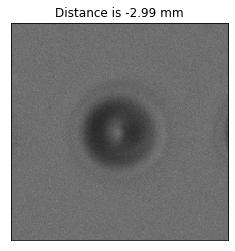

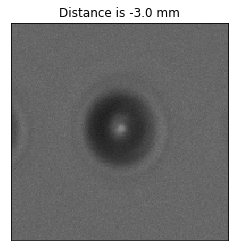

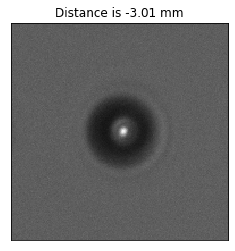

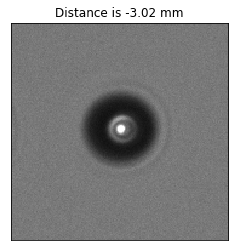

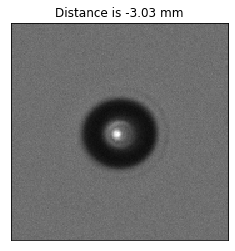

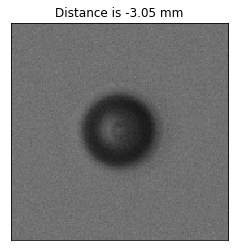

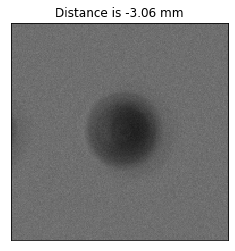

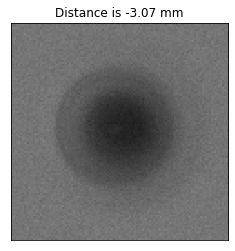

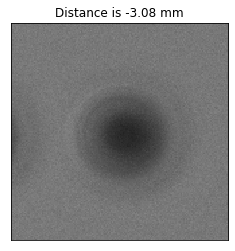

In [5]:
current_path = cwd = os.getcwd()

directories_with_inputs = ['Results_200311/Scans']

droplets_distances = []

list_droplet_profiles=[]

for directory_with_input_index, directory_with_input in enumerate(directories_with_inputs):
    path_to_files = '/'.join([current_path, directory_with_input])
    path_to_results = '/'.join([cwd, 'Results_' + directory_with_input])
    os.makedirs(path_to_results, exist_ok=True)

    list_of_files = [my_file for my_file in os.listdir(
        path_to_files) if not my_file.startswith('.')]  # to avoid hidden files like .DS_file
    print(directory_with_input+':')
    print('found {0} files'.format(str(len(list_of_files))))
    list_of_files.sort()
    print('sorted')

    list_of_files_to_do = list_of_files.copy()  # [0:4000:300]

    list_of_image_files = []

    for file_index, file_name in enumerate(list_of_files_to_do):
        splitted = re.split('_|-', file_name)
        distance = -(int(splitted[1])+int(splitted[2])*0.010000)
        # print(distance)
        droplets_distances.append(distance)
        #print(file_name)

        if (splitted[4] == '0.png' and splitted[5] == '0') or file_name =='minus_3_07-03112020115725-8.png_0_x180_y936_r20_cut0.png' or file_name =='minus_3_08-03112020115809-48.png_0_x176_y930_r27_cut0.png':
            #print('\n')

            image = cv2.imread(directory_with_input+'/'+file_name)
            image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            fig = plt.figure()
            ax = plt.gca()
            ax.imshow(image)
            ax.set_title('Distance is {} mm'.format(distance))

            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            plt.savefig(
                'Results_200311/{0}_droplet_example.png'.format(distance))
            
            list_droplet_profiles.append(DropletProfile(image_gray,distance))

No handles with labels found to put in legend.
No handles with labels found to put in legend.


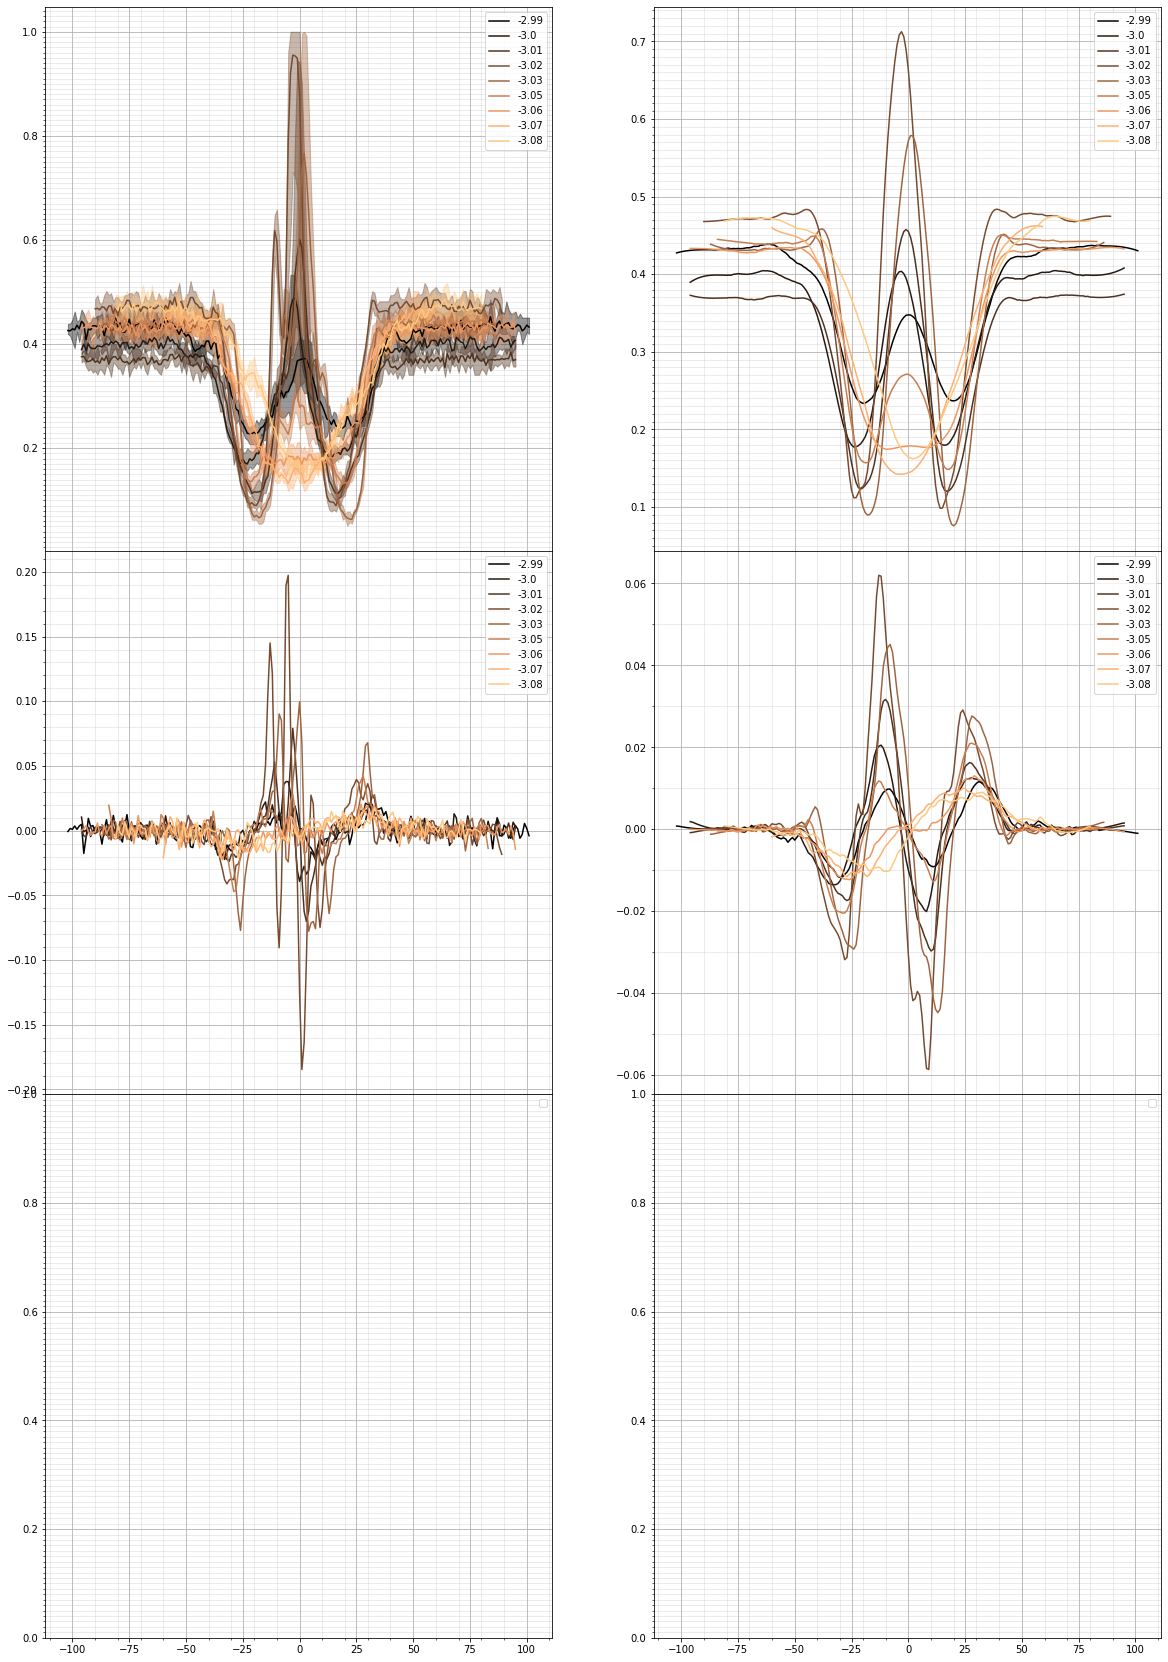

In [30]:
fig3,([[ax3_0,ax3_0_1],[ax3_1,ax3_1_1],[ax3_2,ax3_2_1]])=plt.subplots(nrows=3,ncols=2,figsize=[20,30],sharex=True,gridspec_kw={'hspace': 0})
#ax4=fig.gca()

axes=np.array([[ax3_0,ax3_0_1],[ax3_1,ax3_1_1],[ax3_2,ax3_2_1]])

number_of_lines=len(list_droplet_profiles)
colors = pl.cm.copper(np.linspace(0,1,number_of_lines))


#values for the algoritms:
range_around_mid=3 #the range around mid to do averaging around


window_size=31 # filter window size
poly_order=3 #filter polynomial order


for droplet_index,droplet in enumerate(list_droplet_profiles):
    
   
    #Load the image, extract common information
    
    image_to_process=droplet.image
    
    width_of_image=image_to_process.shape[0]
    midpoint=int(width_of_image/2)
    
    x_to_plot=np.subtract(range(width_of_image),midpoint)
    
    distance=droplet.y_distance #for labelling
    
    #Pixel intensity
    to_plot_0=np.average(image_to_process[:,midpoint-range_around_mid:midpoint+range_around_mid],axis=1)/255.0   
    ax3_0.plot(x_to_plot,to_plot_0,label=distance,color=colors[droplet_index])

    to_plot_0_hat=savgol_filter(to_plot_0,window_size,poly_order)
    ax3_0_1.plot(x_to_plot,to_plot_0_hat,label=distance,color=colors[droplet_index])
    
    to_plot_1_min=np.min(image_to_process[:,midpoint-range_around_mid:midpoint+range_around_mid],axis=1)
    to_plot_1_max=np.max(image_to_process[:,midpoint-range_around_mid:midpoint+range_around_mid],axis=1)    
    ax3_0.fill_between(x_to_plot,to_plot_1_max/255.0,to_plot_1_min/255.0,alpha=0.4,color=colors[droplet_index])#,label=distance)    

    
    
    #Derivatives
    y=to_plot_0
    x=x_to_plot
    dx=x[1]-x[0]
    y_grad=np.gradient(y,dx)
    
    ax3_1.plot(x_to_plot,y_grad,label=distance,color=colors[droplet_index])
    
    y_hat_grad=np.gradient(to_plot_0_hat,dx)
    ax3_1_1.plot(x_to_plot,y_hat_grad,label=distance,color=colors[droplet_index])


for ax_i in axes.flat[:]:    
    ax_i.xaxis.set_minor_locator(MultipleLocator(10))
    ax_i.yaxis.set_minor_locator(MultipleLocator(0.01))
    ax_i.grid(which='major')
    ax_i.grid(which='minor', alpha=0.3)

    ax_i.legend(loc=1)


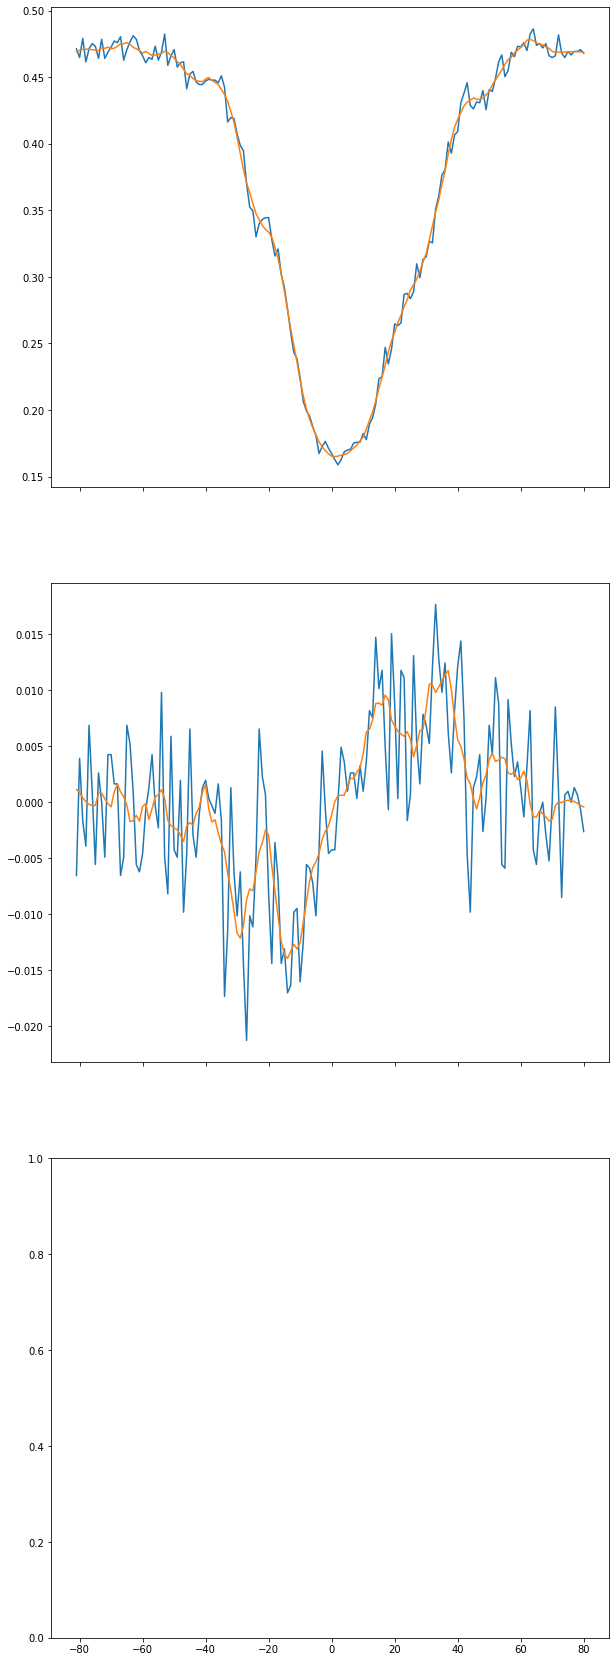

In [7]:
fig3,(ax3_0,ax3_1,ax3_2)=plt.subplots(nrows=3,ncols=1,figsize=[10,30],sharex=True)




y=to_plot_0
x=x_to_plot
dx=x[1]-x[0]
y_grad=np.gradient(y,dx)

ax3_0.plot(x,y)
ax3_1.plot(x,y_grad)

y_hat = savgol_filter(y, 15, 3) # window size 15, polynomial order 3

y_hat_grad=y_grad=np.gradient(y_hat,dx)

ax3_0.plot(x,y_hat)
ax3_1.plot(x,y_hat_grad)

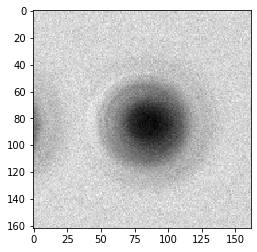

In [28]:
plt.imshow(image_to_process,cmap='gray')

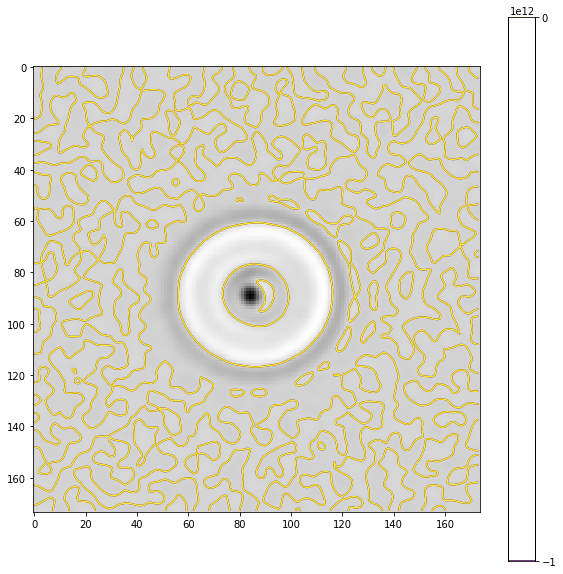

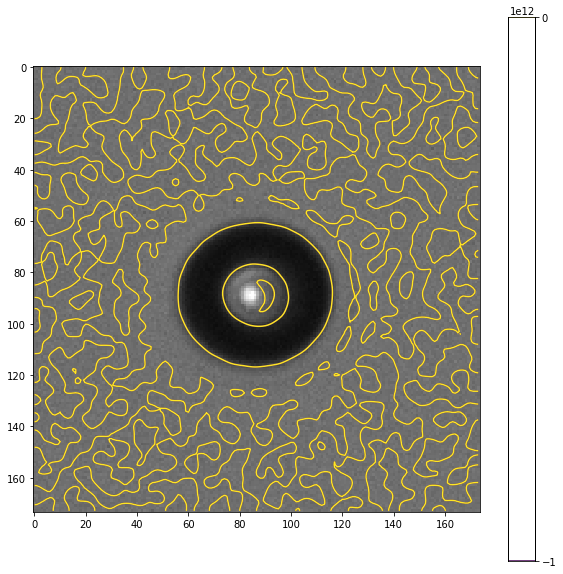

In [32]:
pic_to_look_at=4

plt.figure(figsize=[10,10])
laplacian = cv2.Laplacian(list_droplet_profiles[pic_to_look_at].image,cv2.CV_64F,ksize=31)
plt.imshow(laplacian,cmap='gray')#,vmin=-5,vmax=1e18)
plt.contour(laplacian,levels=[-1e12,0])
plt.colorbar()


plt.figure(figsize=[10,10])
image = list_droplet_profiles[pic_to_look_at].image
plt.imshow(image,cmap='gray',vmin=0,vmax=255)
plt.contour(laplacian,levels=[-1e12,0])
plt.colorbar()

([array([  0.,   0.,   0.,   0.,  48., 120.,   0.,   0.,   0.,   0.]),
  array([  0.,   0.,   0.,   0.,  48., 120.,   0.,   0.,   0.,   0.]),
  array([  0.,   0.,   0.,   0.,  44., 124.,   0.,   0.,   0.,   0.]),
  array([  0.,   0.,   0.,   0.,  27., 141.,   0.,   0.,   0.,   0.]),
  array([  0.,   0.,   0.,   0.,  27., 141.,   0.,   0.,   0.,   0.]),
  array([  0.,   0.,   0.,   0.,  34., 134.,   0.,   0.,   0.,   0.]),
  array([  0.,   0.,   0.,   0.,  36., 132.,   0.,   0.,   0.,   0.]),
  array([  0.,   0.,   0.,   0.,  40., 128.,   0.,   0.,   0.,   0.]),
  array([  0.,   0.,   0.,   0.,  39., 129.,   0.,   0.,   0.,   0.]),
  array([  0.,   0.,   0.,   0.,  38., 130.,   0.,   0.,   0.,   0.]),
  array([  0.,   0.,   0.,   0.,  49., 119.,   0.,   0.,   0.,   0.]),
  array([  0.,   0.,   0.,   0.,  64., 104.,   0.,   0.,   0.,   0.]),
  array([  0.,   0.,   0.,   0.,  59., 109.,   0.,   0.,   0.,   0.]),
  array([  0.,   0.,   0.,   0.,  40., 128.,   0.,   0.,   0.,   0.]),
  arra

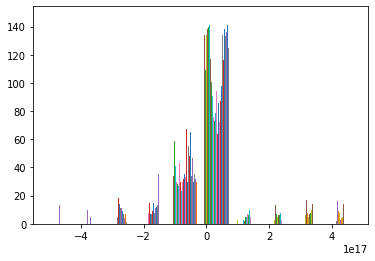

In [9]:
plt.hist(laplacian)